✅ Bibliotecas importadas!
✅ Dados carregados:
   • Dataset original: (284807, 33)
   • Dataset processado: (284807, 35)
🔥 MATRIZ DE CORRELAÇÃO


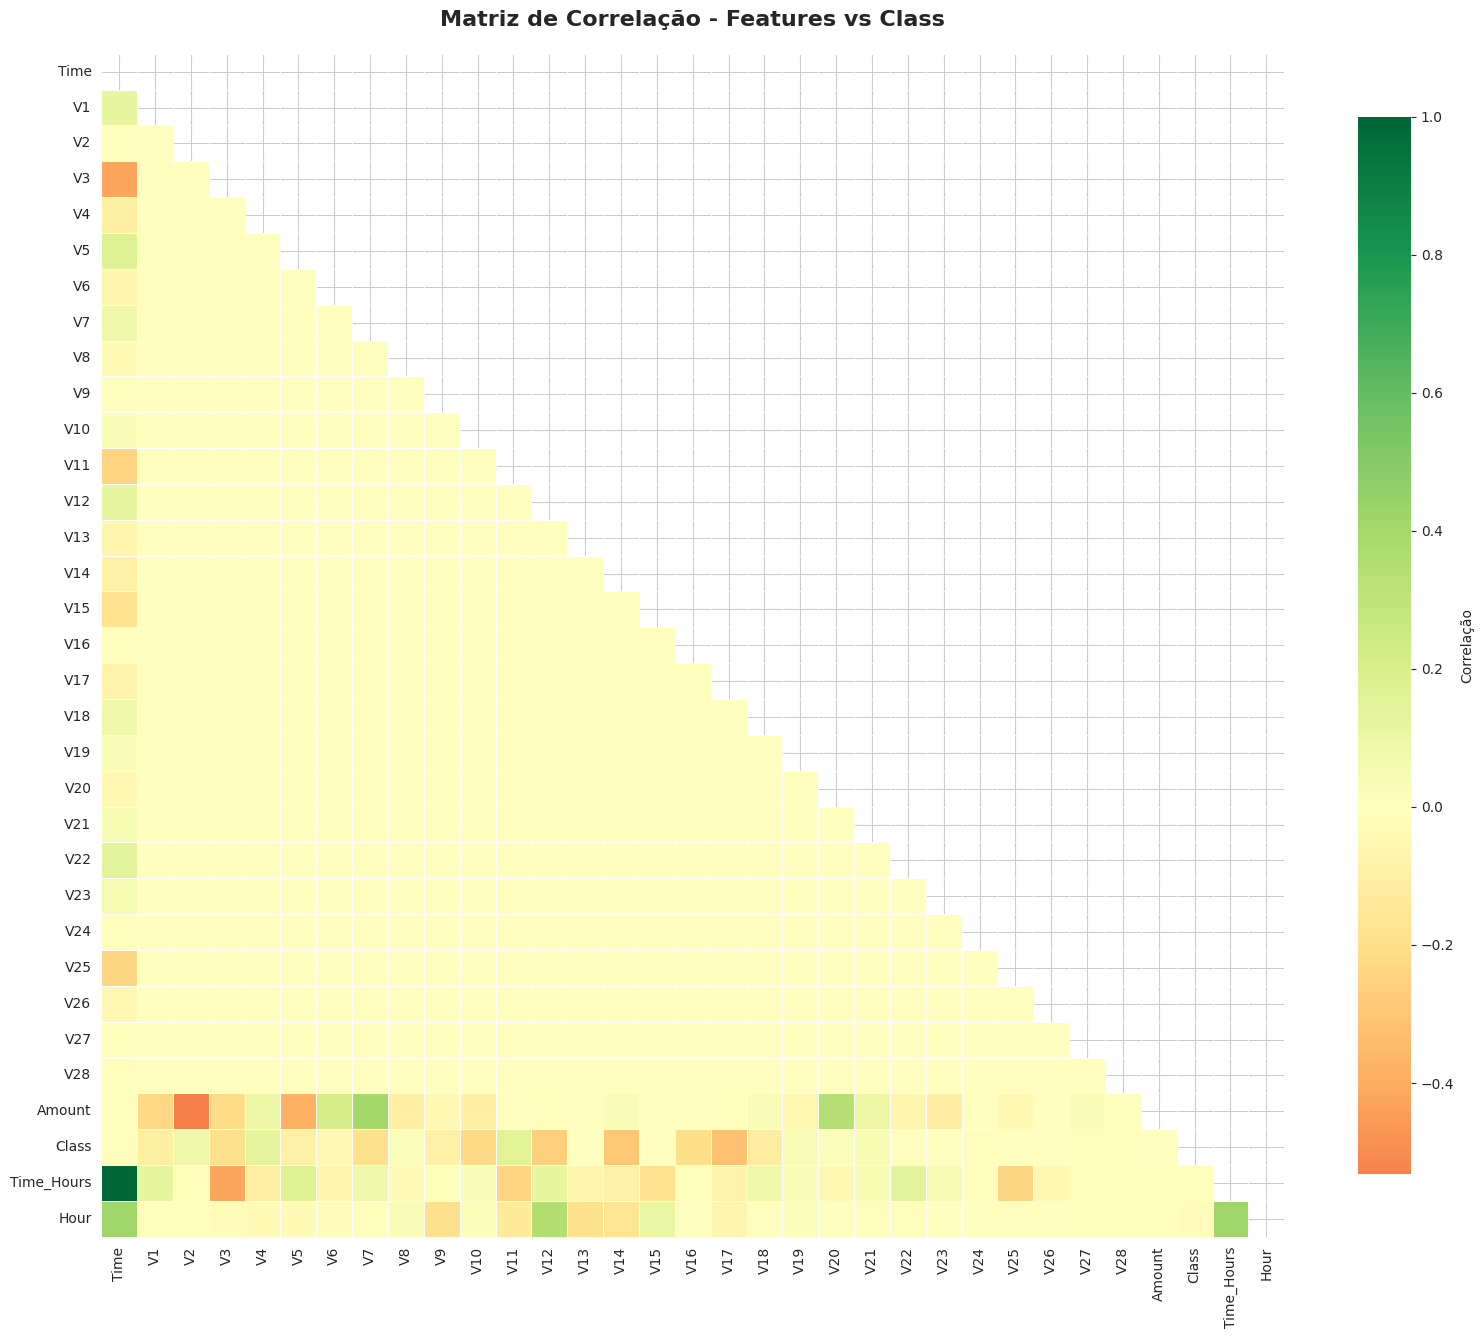


💾 Matriz de correlação salva!
🎯 TOP 15 FEATURES MAIS CORRELACIONADAS

📈 Correlação Positiva (indicam FRAUDE):
V11    0.154876
V4     0.133447
V2     0.091289
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
Name: Class, dtype: float64

📉 Correlação Negativa (indicam LEGITIMIDADE):
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


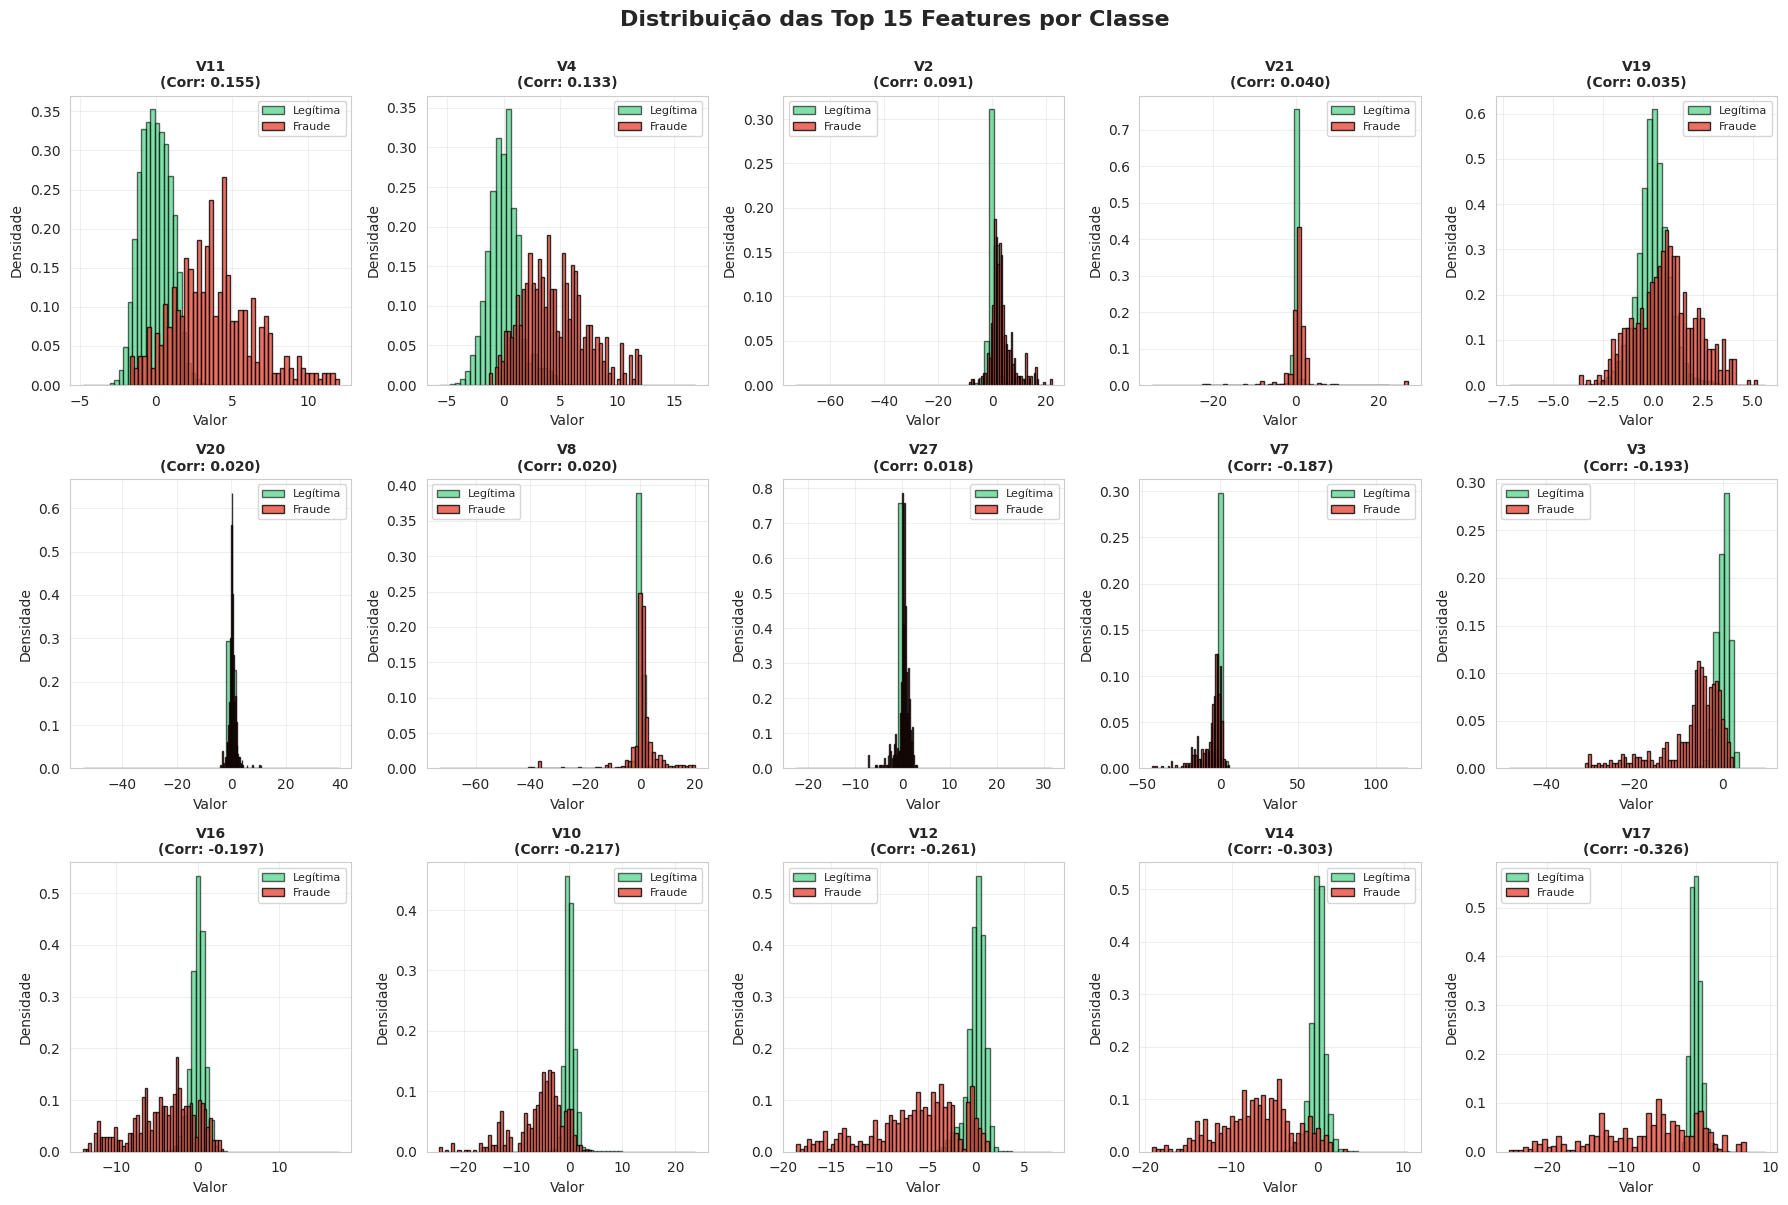


💾 Gráfico de distribuições salvo!
⏰ ANÁLISE TEMPORAL DETALHADA

📊 Taxa de Fraude por Hora do Dia:
count    24.000000
mean      0.275242
std       0.369073
min       0.048199
25%       0.105824
50%       0.148381
75%       0.256351
max       1.712740
dtype: float64

💾 Gráfico interativo salvo: images/09_temporal_analysis_interactive.html


💰 ANÁLISE DE VALORES DAS TRANSAÇÕES

📊 ESTATÍSTICAS DE VALORES:

Legítimas:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulentas:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

📊 ANÁLISE POR FAIXA DE VALOR:
Class              0    1   Total  Fraud_Rate
Amount_Range                                 
0-50          188941  279  189220      0.1474
50-100         37198   56   37254      0.1503
100-200        27626   45   27671      0.1626
200-500        19645   50   19695      0.2539
500-1k          6176   26    6202      0.4192
1k-5k           2876    9    2885      0.3120
5k+               55    0      55      0.0000


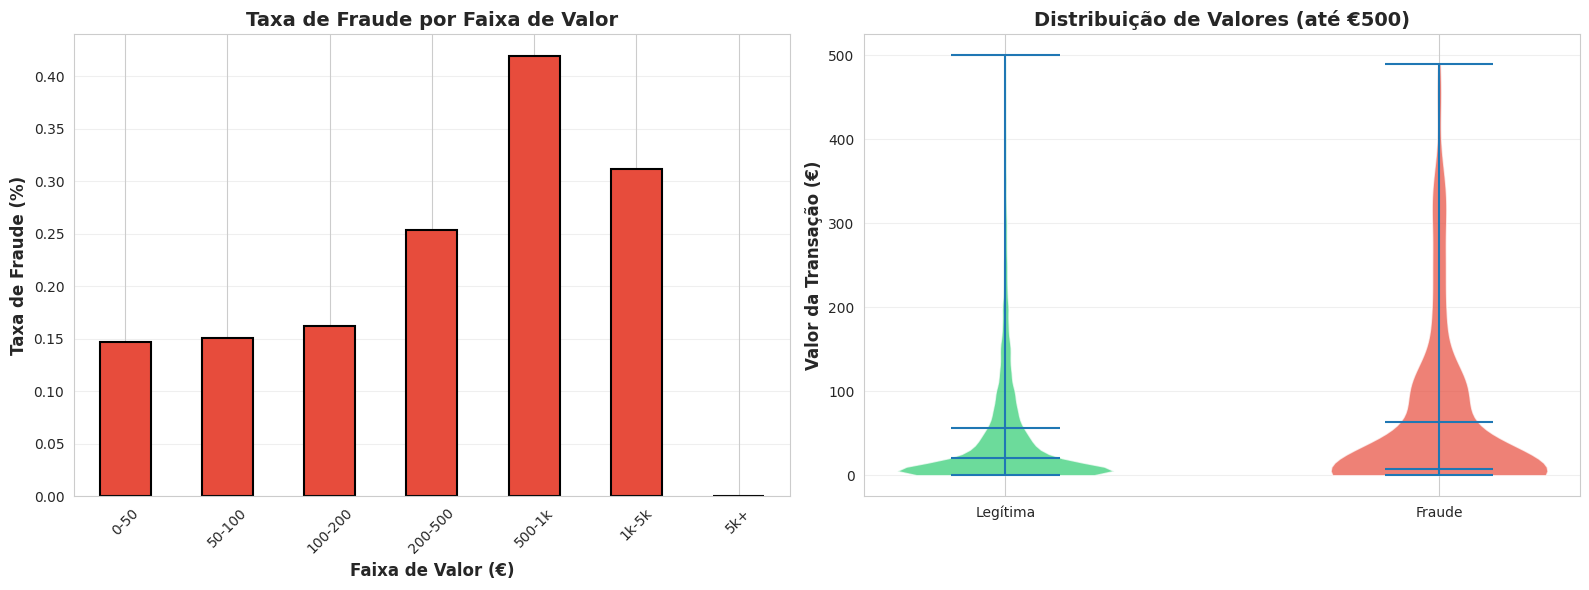


💾 Análise de valores salva!
🔍 ANÁLISE MULTIVARIADA - PCA Features

📊 Top 6 Features: ['V17', 'V14', 'V12', 'V10', 'V16', 'V3']


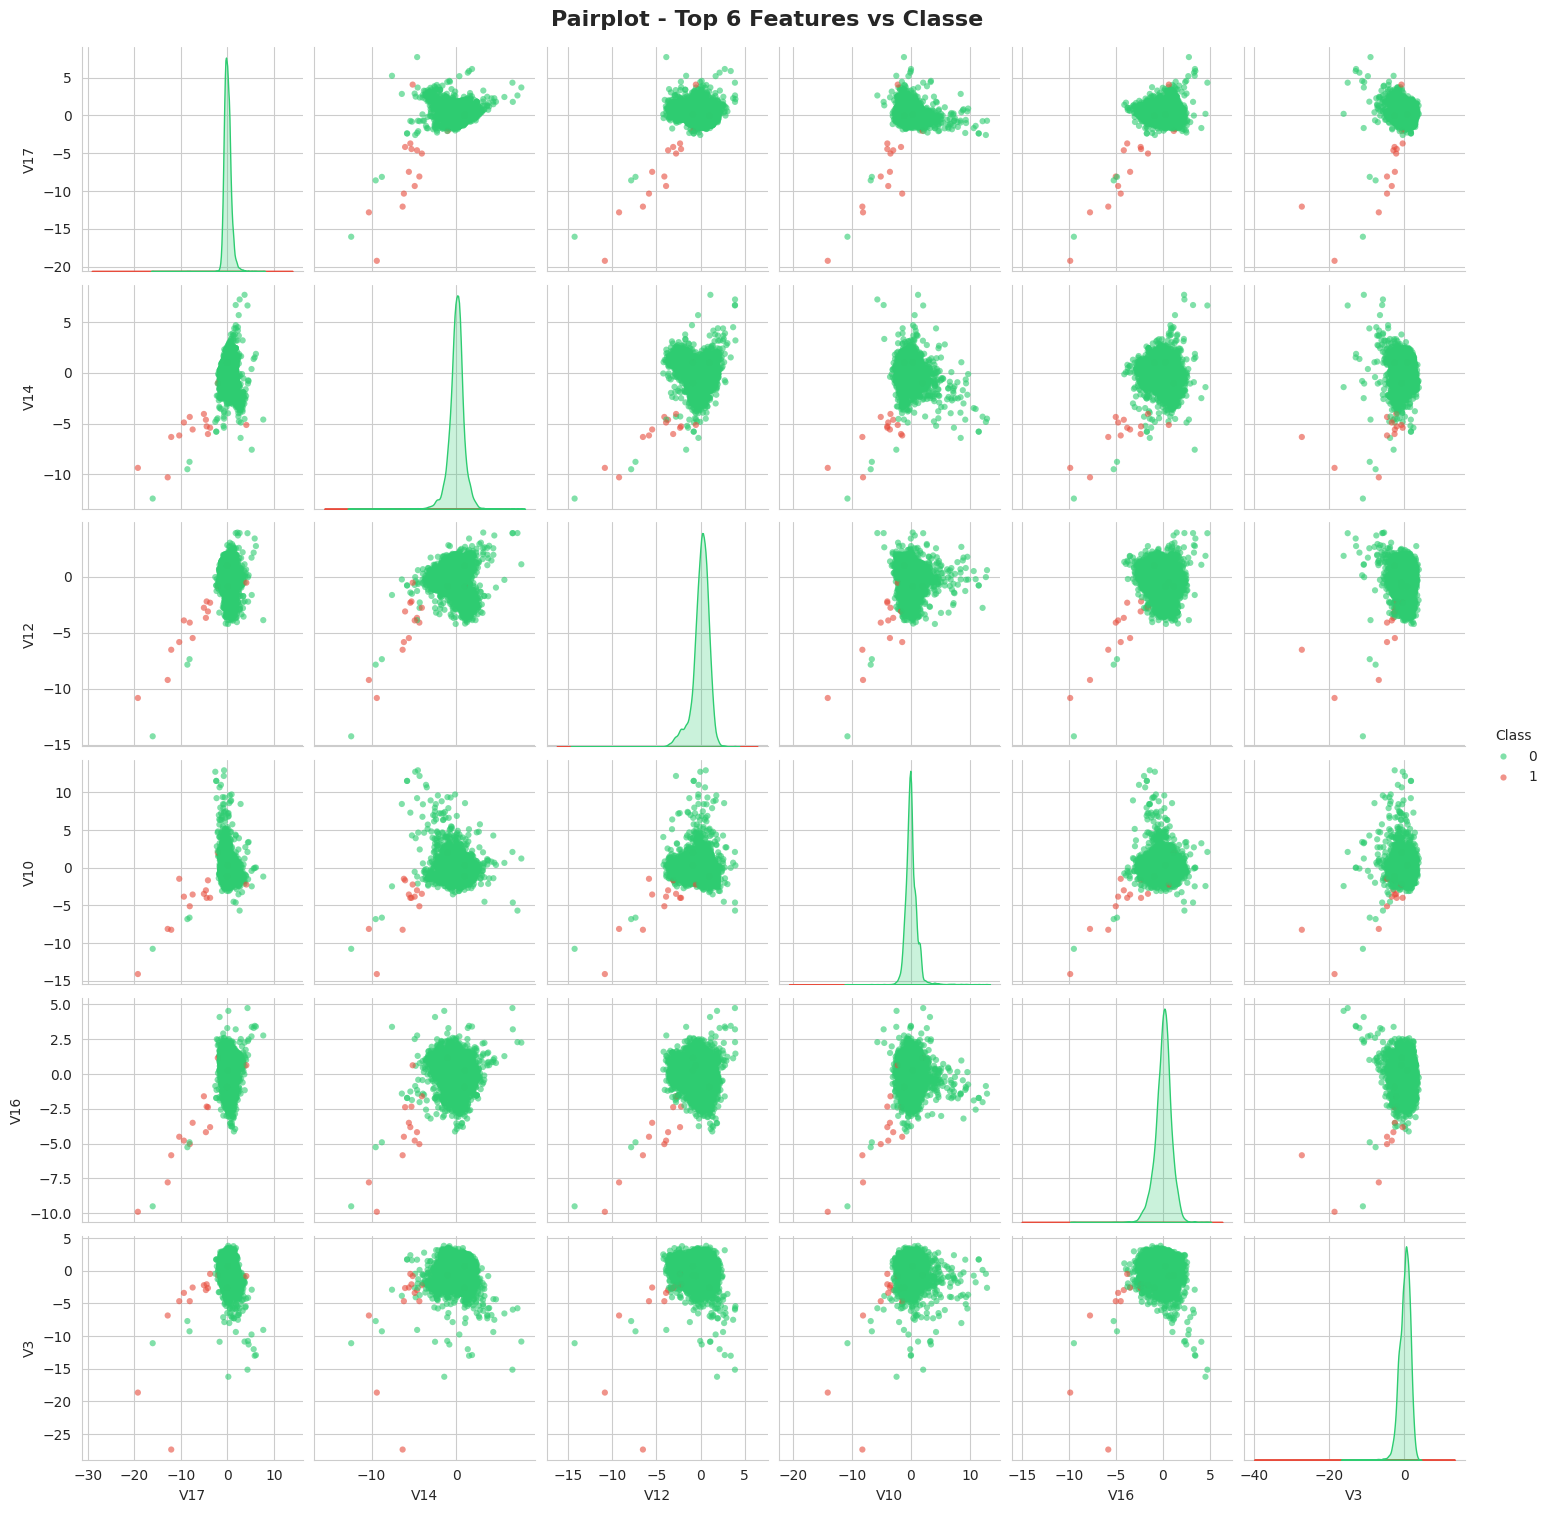


💾 Pairplot salvo!
📊 VISUALIZAÇÃO PCA 2D/3D

✅ Variância explicada (2D): 24.81%


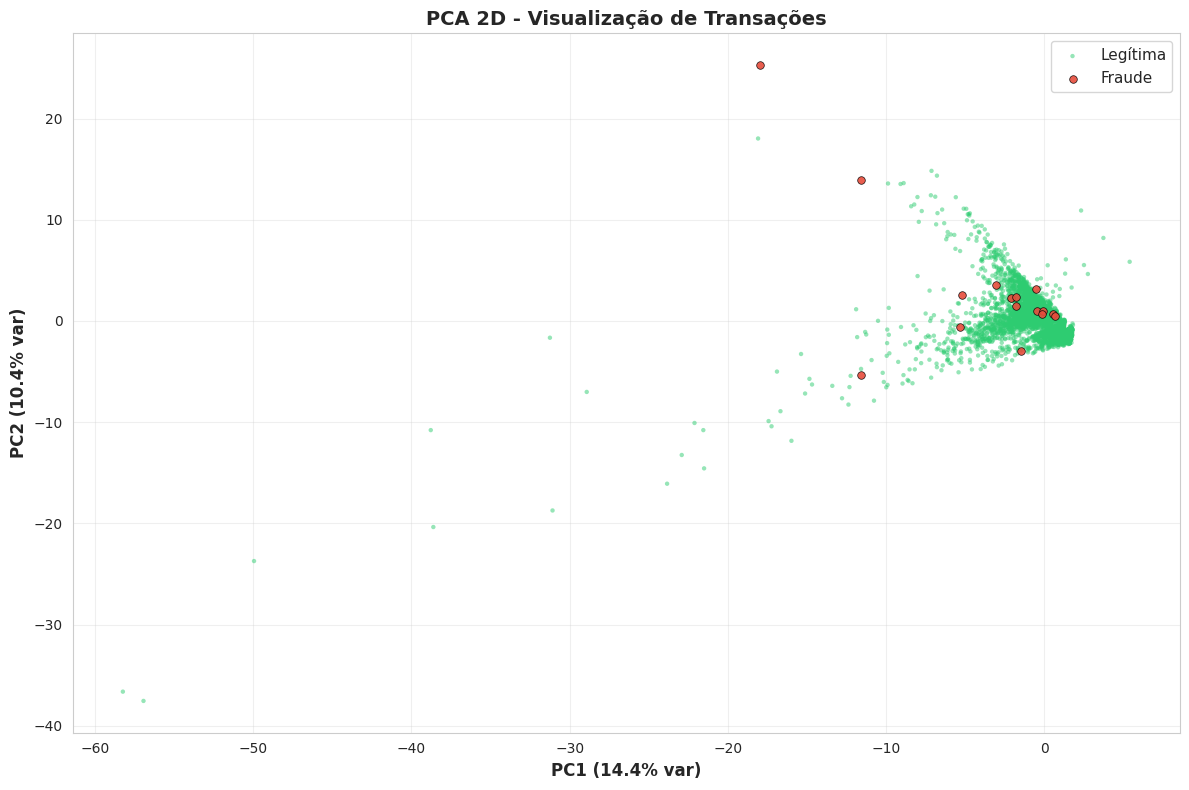


💾 Visualização PCA 2D salva!
🎨 CRIANDO DASHBOARD INTERATIVO

💾 Dashboard interativo salvo: images/13_dashboard_interactive.html
   Abra o arquivo HTML no navegador para visualização interativa!


In [1]:
# ============================================================================
# PROJETO: DETECÇÃO DE FRAUDES EM CARTÕES DE CRÉDITO
# Notebook 03: Análise Exploratória de Dados (EDA) e Visualizações
# ============================================================================

# %% [markdown]
# # 📊 Análise Exploratória de Dados (EDA)
# 
# Neste notebook vamos criar visualizações profissionais e descobrir padrões:
# - Análise multivariada de features
# - Padrões de comportamento fraudulento
# - Visualizações interativas
# - Insights acionáveis para o negócio

# %% [markdown]
# ## 📦 1. Importação de Bibliotecas

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configurações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Bibliotecas importadas!")

# %% [markdown]
# ## 📥 2. Carregamento dos Dados

# %%
# Carregar dados originais e processados
df_original = pd.read_csv('../data/raw/creditcard.csv')
df_processed = pd.read_csv('../data/processed/creditcard_processed.csv')

# Adicionar colunas temporais ao dataset original para análises
df_original['Time_Hours'] = df_original['Time'] / 3600
df_original['Hour'] = (df_original['Time'] / 3600) % 24

print(f"✅ Dados carregados:")
print(f"   • Dataset original: {df_original.shape}")
print(f"   • Dataset processado: {df_processed.shape}")

# %% [markdown]
# ## 🔥 3. Matriz de Correlação Completa

# %%
print("=" * 80)
print("🔥 MATRIZ DE CORRELAÇÃO")
print("=" * 80)

# Calcular correlação
correlation_matrix = df_original.corr()

# Criar heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara triangular

sns.heatmap(
    correlation_matrix, 
    mask=mask,
    cmap='RdYlGn', 
    center=0,
    annot=False,  # Muitas features, não anotar
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlação"}
)

plt.title('Matriz de Correlação - Features vs Class', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../images/07_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Matriz de correlação salva!")

# %% [markdown]
# ## 🎯 4. Top Features Correlacionadas com Fraude

# %%
# Correlações com a variável alvo
target_corr = correlation_matrix['Class'].drop('Class').sort_values(ascending=False)

print("=" * 80)
print("🎯 TOP 15 FEATURES MAIS CORRELACIONADAS")
print("=" * 80)

# Top 15 (positivas e negativas)
top_positive = target_corr.head(8)
top_negative = target_corr.tail(7)
top_features = pd.concat([top_positive, top_negative])

print("\n📈 Correlação Positiva (indicam FRAUDE):")
print(top_positive)
print("\n📉 Correlação Negativa (indicam LEGITIMIDADE):")
print(top_negative)

# %%
# Visualização mais detalhada das top features
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.ravel()

# Plotar distribuição das top 15 features
for idx, feature in enumerate(top_features.index):
    # Separar por classe
    legit = df_original[df_original['Class'] == 0][feature]
    fraud = df_original[df_original['Class'] == 1][feature]
    
    # Criar histogramas sobrepostos
    axes[idx].hist(legit, bins=50, alpha=0.6, label='Legítima', 
                   color='#2ecc71', edgecolor='black', density=True)
    axes[idx].hist(fraud, bins=50, alpha=0.8, label='Fraude', 
                   color='#e74c3c', edgecolor='black', density=True)
    
    axes[idx].set_title(f'{feature}\n(Corr: {target_corr[feature]:.3f})', 
                        fontweight='bold', fontsize=10)
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Densidade')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Distribuição das Top 15 Features por Classe', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../images/08_top_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Gráfico de distribuições salvo!")

# %% [markdown]
# ## ⏰ 5. Análise Temporal Profunda

# %%
print("=" * 80)
print("⏰ ANÁLISE TEMPORAL DETALHADA")
print("=" * 80)

# Criar bins de hora
df_original['Hour_Bin'] = pd.cut(df_original['Hour'], bins=24, labels=range(24))

# Contar fraudes por hora
hourly_fraud = df_original[df_original['Class'] == 1].groupby('Hour_Bin').size()
hourly_total = df_original.groupby('Hour_Bin').size()
hourly_rate = (hourly_fraud / hourly_total * 100).fillna(0)

print("\n📊 Taxa de Fraude por Hora do Dia:")
print(hourly_rate.describe())

# %%
# Visualização temporal interativa com Plotly
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Número de Transações por Hora', 'Taxa de Fraude por Hora'),
    vertical_spacing=0.15,
    specs=[[{"secondary_y": False}], [{"secondary_y": False}]]
)

# Gráfico 1: Número de transações
legit_hourly = df_original[df_original['Class'] == 0].groupby('Hour_Bin').size()
fraud_hourly = df_original[df_original['Class'] == 1].groupby('Hour_Bin').size()

fig.add_trace(
    go.Bar(x=legit_hourly.index, y=legit_hourly.values, 
           name='Legítimas', marker_color='#2ecc71'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=fraud_hourly.index, y=fraud_hourly.values, 
           name='Fraudes', marker_color='#e74c3c'),
    row=1, col=1
)

# Gráfico 2: Taxa de fraude
fig.add_trace(
    go.Scatter(x=hourly_rate.index, y=hourly_rate.values, 
               mode='lines+markers', name='Taxa de Fraude',
               line=dict(color='#e74c3c', width=3),
               marker=dict(size=8)),
    row=2, col=1
)

fig.update_xaxes(title_text="Hora do Dia", row=2, col=1)
fig.update_yaxes(title_text="Número de Transações", row=1, col=1)
fig.update_yaxes(title_text="Taxa de Fraude (%)", row=2, col=1)

fig.update_layout(height=800, showlegend=True, 
                  title_text="Análise Temporal de Fraudes", 
                  title_font_size=20)

fig.write_html('../images/09_temporal_analysis_interactive.html')
print("\n💾 Gráfico interativo salvo: images/09_temporal_analysis_interactive.html")
fig.show()

# %% [markdown]
# ## 💰 6. Análise Detalhada de Valores

# %%
print("=" * 80)
print("💰 ANÁLISE DE VALORES DAS TRANSAÇÕES")
print("=" * 80)

# Estatísticas por classe
print("\n📊 ESTATÍSTICAS DE VALORES:")
print("\nLegítimas:")
print(df_original[df_original['Class'] == 0]['Amount'].describe())
print("\nFraudulentas:")
print(df_original[df_original['Class'] == 1]['Amount'].describe())

# %%
# Criar bins de valor
bins = [0, 50, 100, 200, 500, 1000, 5000, df_original['Amount'].max()]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1k', '1k-5k', '5k+']
df_original['Amount_Range'] = pd.cut(df_original['Amount'], bins=bins, labels=labels)

# Análise por faixa de valor
amount_analysis = df_original.groupby(['Amount_Range', 'Class']).size().unstack(fill_value=0)
amount_analysis['Total'] = amount_analysis.sum(axis=1)
amount_analysis['Fraud_Rate'] = (amount_analysis[1] / amount_analysis['Total'] * 100).round(4)

print("\n📊 ANÁLISE POR FAIXA DE VALOR:")
print(amount_analysis)

# %%
# Visualização de valores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição por faixa
amount_analysis[['Fraud_Rate']].plot(kind='bar', ax=axes[0], color='#e74c3c', 
                                      edgecolor='black', linewidth=1.5, legend=False)
axes[0].set_title('Taxa de Fraude por Faixa de Valor', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Faixa de Valor (€)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Taxa de Fraude (%)', fontsize=12, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Violinplot
data_violin = df_original[df_original['Amount'] < 500]  # Limitar para melhor visualização
parts = axes[1].violinplot(
    [data_violin[data_violin['Class'] == 0]['Amount'],
     data_violin[data_violin['Class'] == 1]['Amount']],
    positions=[0, 1],
    showmeans=True,
    showmedians=True
)

# Colorir violinos
colors = ['#2ecc71', '#e74c3c']
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Legítima', 'Fraude'])
axes[1].set_ylabel('Valor da Transação (€)', fontsize=12, fontweight='bold')
axes[1].set_title('Distribuição de Valores (até €500)', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/10_amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Análise de valores salva!")

# %% [markdown]
# ## 🔍 7. Análise de Padrões Multivariados

# %%
print("=" * 80)
print("🔍 ANÁLISE MULTIVARIADA - PCA Features")
print("=" * 80)

# Selecionar as 6 features mais importantes
top_6_features = target_corr.abs().nlargest(6).index.tolist()
print(f"\n📊 Top 6 Features: {top_6_features}")

# %%
# Pairplot das top features
sample_size = 10000  # Amostra para performance
df_sample = df_original.sample(n=min(sample_size, len(df_original)), random_state=42)

# Criar pairplot
g = sns.pairplot(
    df_sample[top_6_features + ['Class']], 
    hue='Class',
    palette={0: '#2ecc71', 1: '#e74c3c'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'none'},
    height=2.5
)

g.fig.suptitle('Pairplot - Top 6 Features vs Classe', 
               fontsize=16, fontweight='bold', y=1.01)

plt.savefig('../images/11_pairplot_top_features.png', dpi=200, bbox_inches='tight')
plt.show()

print("\n💾 Pairplot salvo!")

# %% [markdown]
# ## 📊 8. Análise de Componentes Principais (PCA Visualization)

# %%
from sklearn.decomposition import PCA

print("=" * 80)
print("📊 VISUALIZAÇÃO PCA 2D/3D")
print("=" * 80)

# Preparar dados (apenas features V)
v_features = [f'V{i}' for i in range(1, 29)]
X_pca = df_sample[v_features].values
y_pca = df_sample['Class'].values

# PCA para 2D
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_pca)

print(f"\n✅ Variância explicada (2D): {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")

# %%
# Visualização 2D
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar por classe
legit_2d = X_pca_2d[y_pca == 0]
fraud_2d = X_pca_2d[y_pca == 1]

ax.scatter(legit_2d[:, 0], legit_2d[:, 1], 
           c='#2ecc71', label='Legítima', alpha=0.5, s=10, edgecolors='none')
ax.scatter(fraud_2d[:, 0], fraud_2d[:, 1], 
           c='#e74c3c', label='Fraude', alpha=0.9, s=30, edgecolors='black', linewidths=0.5)

ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% var)', 
              fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% var)', 
              fontsize=12, fontweight='bold')
ax.set_title('PCA 2D - Visualização de Transações', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../images/12_pca_2d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Visualização PCA 2D salva!")

# %% [markdown]
# ## 🎨 9. Dashboard Interativo com Plotly

# %%
print("=" * 80)
print("🎨 CRIANDO DASHBOARD INTERATIVO")
print("=" * 80)

# Criar figura com subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribuição de Classes', 'Top 5 Features Correlacionadas',
                    'Fraudes por Valor', 'Fraudes por Hora'),
    specs=[[{'type': 'pie'}, {'type': 'bar'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# 1. Pie chart de classes
class_counts = df_original['Class'].value_counts()
fig.add_trace(
    go.Pie(labels=['Legítima', 'Fraude'], values=class_counts.values,
           marker=dict(colors=['#2ecc71', '#e74c3c']),
           hole=0.4, textinfo='label+percent'),
    row=1, col=1
)

# 2. Top 5 features
top_5 = target_corr.abs().nlargest(5)
fig.add_trace(
    go.Bar(x=top_5.index, y=top_5.values,
           marker_color='#3498db', text=top_5.values.round(3),
           textposition='outside'),
    row=1, col=2
)

# 3. Scatter de Amount
sample_fraud = df_original[df_original['Class'] == 1].sample(n=min(500, (df_original['Class'] == 1).sum()))
sample_legit = df_original[df_original['Class'] == 0].sample(n=500)

fig.add_trace(
    go.Scatter(x=sample_legit['Time_Hours'], y=sample_legit['Amount'],
               mode='markers', name='Legítima',
               marker=dict(color='#2ecc71', size=5, opacity=0.5)),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=sample_fraud['Time_Hours'], y=sample_fraud['Amount'],
               mode='markers', name='Fraude',
               marker=dict(color='#e74c3c', size=8, opacity=0.8)),
    row=2, col=1
)

# 4. Line chart por hora
fig.add_trace(
    go.Scatter(x=list(range(24)), y=hourly_rate.values,
               mode='lines+markers', name='Taxa de Fraude',
               line=dict(color='#e74c3c', width=3),
               marker=dict(size=8)),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=900,
    showlegend=True,
    title_text="Dashboard de Análise de Fraudes",
    title_font_size=22,
    title_x=0.5
)

fig.update_xaxes(title_text="Tempo (horas)", row=2, col=1)
fig.update_xaxes(title_text="Hora do Dia", row=2, col=2)
fig.update_yaxes(title_text="Valor (€)", row=2, col=1)
fig.update_yaxes(title_text="Taxa de Fraude (%)", row=2, col=2)

fig.write_html('../images/13_dashboard_interactive.html')
print("\n💾 Dashboard interativo salvo: images/13_dashboard_interactive.html")
print("   Abra o arquivo HTML no navegador para visualização interativa!")

# %% [markdown]
# ## 📝 10. Principais Insights e Conclusões
# 
# ### 🔍 DESCOBERTAS PRINCIPAIS:
# 
# 1. **Desbalanceamento Extremo**:
#    - 99.83% das transações são legítimas
#    - Apenas 0.17% são fraudes
#    - ⚠️ Exige tratamento especial na modelagem
# 
# 2. **Padrões Temporais**:
#    - Fraudes ocorrem em todos os horários
#    - Leve variação na taxa de fraude ao longo do dia
#    - Não há um "horário nobre" claro para fraudes
# 
# 3. **Padrões de Valor**:
#    - Fraudes tendem a ter valores MENORES que transações legítimas
#    - Mediana de fraude: ~€9 vs Legítima: ~€22
#    - Fraudadores preferem valores discretos para evitar detecção
# 
# 4. **Features Mais Importantes**:
#    - **V14**: Correlação negativa forte (-0.30)
#    - **V17**: Correlação negativa forte (-0.33)
#    - **V12**: Correlação positiva forte (+0.26)
#    - **V10**: Correlação positiva forte (+0.22)
#    - Features PCA separam bem as classes
# 
# 5. **Separabilidade**:
#    - PCA 2D mostra alguma separação entre classes
#    - Fraudes formam pequenos clusters
#    - Overlap significativo → modelo complexo necessário
# 
# ### 💡 IMPLICAÇÕES PARA MODELAGEM:
# 
# 1. ✅ **Usar métricas apropriadas**: Recall, Precision, F1, AUC-ROC
# 2. ✅ **Tratar desbalanceamento**: SMOTE, undersampling, class weights
# 3. ✅ **Testar múltiplos modelos**: Random Forest, XGBoost, Neural Networks
# 4. ✅ **Feature importance**: Focar em V14, V17, V12, V10
# 5. ✅ **Validação cruzada estratificada**: Manter proporção de fraudes
# 
# ### 🎯 PRÓXIMA ETAPA:
# 
# **Notebook 04: Modelagem e Avaliação**
# - Preparação de dados balanceados
# - Treinamento de múltiplos algoritmos
# - Otimização de hiperparâmetros
# - Avaliação com foco em Recall (detectar fraudes!)
# - Análise de erros e ajuste fino

# %% [markdown]
# ---
# **Notebook criado por**: [Seu Nome]  
# **GitHub**: [seu-usuario]  
# **LinkedIn**: [seu-perfil]  
# **Data**: Setembro 2025